<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/class-activities/Class_Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [3]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [4]:
print(data)

[array([1.        , 5.86613996, 6.69819795]), array([ 1.        , -3.76375934, -3.49531522]), array([ 1.        , -2.58422451, -1.48099125]), array([1.        , 3.54928927, 4.97044643]), array([1.        , 7.57648463, 7.73193227]), array([ 1.        , -0.40570266, -0.34819448]), array([1.        , 7.25724779, 7.77383885]), array([ 1.        , -9.20431223, -8.5998728 ]), array([ 1.        , -2.19796782, -0.90212896]), array([ 1.        , -0.98512271,  0.26237738]), array([ 1.        , -7.78934202, -7.40960784]), array([ 1.        , -6.34911525, -4.52161934]), array([ 1.        , -0.27581039,  0.79378517]), array([1.        , 6.64249649, 7.31217168]), array([1.        , 3.1399262 , 4.43677719]), array([ 1.        , -4.76622818, -3.86493661]), array([ 1.        , -5.03498523, -4.04859024]), array([ 1.        , -4.57743243, -4.17794088]), array([ 1.        , -0.99490928, -0.07879402]), array([ 1.        , -7.50962123, -7.08286314]), array([ 1.        , -6.4890552 , -5.12461501]), array([1.

In [5]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

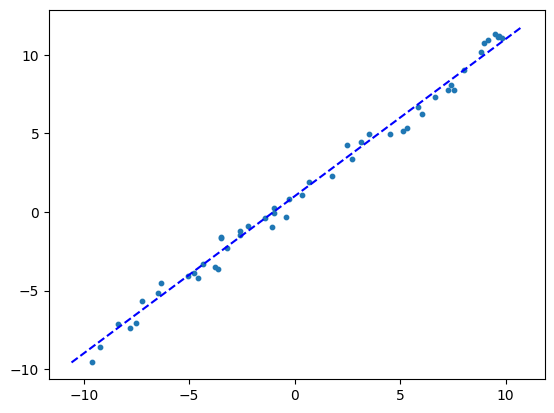

In [6]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [7]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [8]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [9]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[ 0.02024894, -0.00037976],
       [-0.00037976,  0.00057931]])

In [10]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 1.80212434e-02,  2.16782505e-02,  2.12303157e-02,
         1.89010802e-02,  1.73717306e-02,  2.04030100e-02,
         1.74929626e-02,  2.37443303e-02,  2.10836326e-02,
         2.06230480e-02,  2.32069876e-02,  2.26600536e-02,
         2.03536827e-02,  1.77264177e-02,  1.90565380e-02,
         2.20589435e-02,  2.21610055e-02,  2.19872473e-02,
         2.06267645e-02,  2.31007621e-02,  2.27131965e-02,
         1.99840456e-02,  1.79629876e-02,  1.65158580e-02,
         1.68407237e-02,  1.85395603e-02,  2.16308457e-02,
         1.68872069e-02,  2.06516471e-02,  2.38965543e-02,
         1.71972571e-02,  1.83059817e-02,  2.29941926e-02,
         1.82301121e-02,  2.15663957e-02,  2.12408410e-02,
         1.92140425e-02,  1.65929559e-02,  2.15663484e-02,
         1.92971800e-02,  1.65667844e-02,  1.67706996e-02,
         2.01223493e-02,  2.14662366e-02,  2.07855065e-02,
         2.19021988e-02,  1.95690704e-02,  1.74250217e-02,
         1.66472936e-02,  2.34289000e-02],
       [ 3.01

In [11]:
w = np.matmul(X_pi, Y)
w

array([0.93197251, 1.01111795])

Plot the final hypothesis with the target and the data points

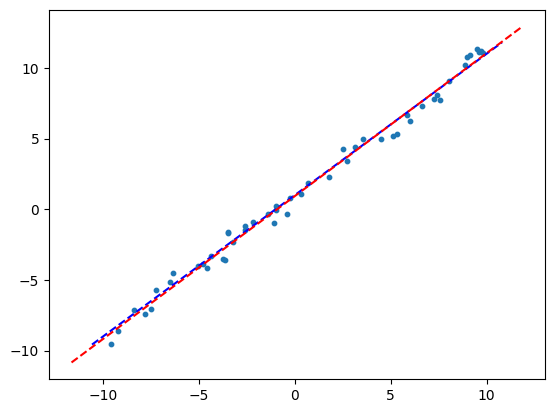

In [12]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [13]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

15.46459769241987

In [14]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

2072.3985435510504

What about the test data set?

In [15]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

17.877714982695494

In [16]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

16.562195330406077

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 50)
Y = 2 * X + 1 + np.random.normal(0, 1, 50)

# Define the regularized linear regression hypothesis
def hypothesis(theta, X):
    return theta[0] + theta[1] * X

# Define the cost function with L2 regularization (ridge regression)
def cost_function(theta, X, Y, lambda_reg):
    m = len(Y)
    h = hypothesis(theta, X)
    reg_term = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / (2 * m)) * np.sum(np.square(h - Y)) + reg_term
    return J

# Define the gradient descent function with L2 regularization
def gradient_descent(theta, X, Y, alpha, lambda_reg):
    m = len(Y)
    h = hypothesis(theta, X)
    gradient = np.zeros(2)
    gradient[0] = (1 / m) * np.sum(h - Y)
    gradient[1] = (1 / m) * np.sum((h - Y) * X) + (lambda_reg / m) * theta[1]
    theta = theta - alpha * gradient
    return theta

# Create a function to train and return the regularized model
def train_regularized_linear_regression(X, Y, lambda_reg, alpha, num_iterations):
    m = len(Y)
    theta = np.zeros(2)

    for _ in range(num_iterations):
        theta = gradient_descent(theta, X, Y, alpha, lambda_reg)

    return theta

# Split the data into training and test sets
X_train, Y_train = X[:40], Y[:40]
X_test, Y_test = X[40:], Y[40:]


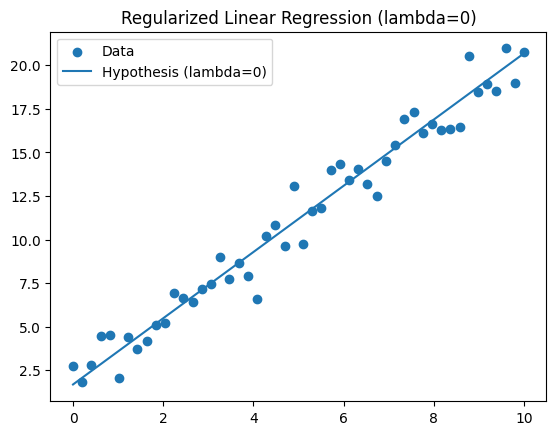

Lambda = 0, Test Cost = 0.6674395304819578


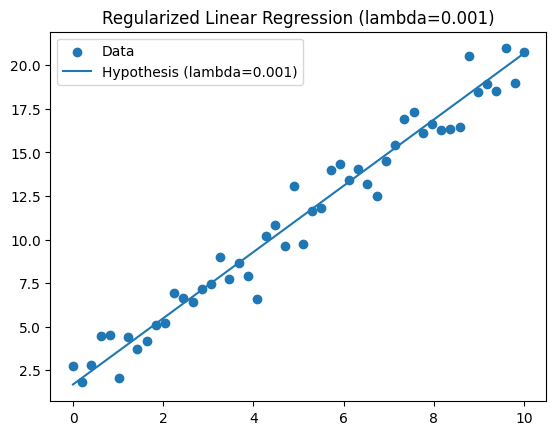

Lambda = 0.001, Test Cost = 0.6676075519877941


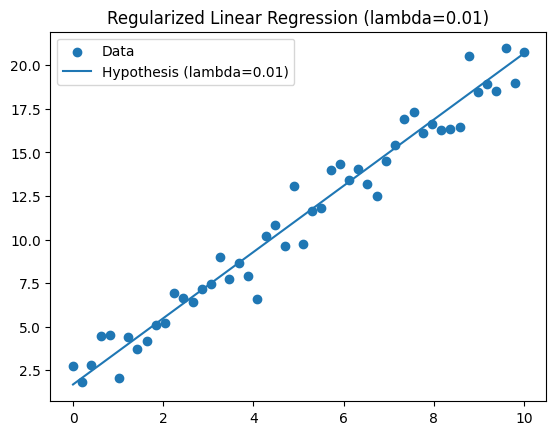

Lambda = 0.01, Test Cost = 0.6691196916018554


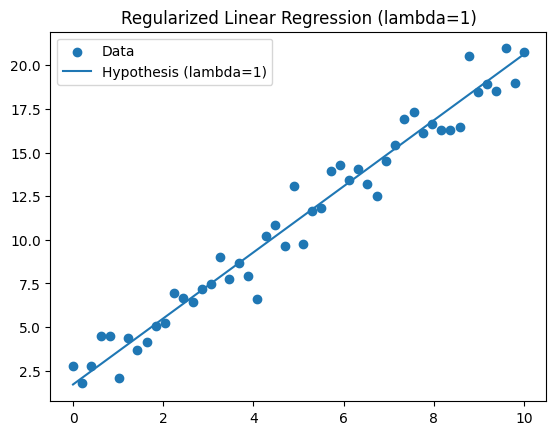

Lambda = 1, Test Cost = 0.8348642742715574
Best Lambda: 0
Best Theta: [1.68404944 1.89951032]


In [18]:
# Define the range of lambda values to experiment with
lambda_values = [0, 0.001, 0.01, 1]

# Initialize some variables to store results
best_lambda = None
best_theta = None
best_cost = float('inf')

# Perform experiments for different lambda values
for lambda_reg in lambda_values:
    # Train a regularized model
    theta = train_regularized_linear_regression(X_train, Y_train, lambda_reg, alpha=0.01, num_iterations=1000)

    # Calculate the cost on the test set
    test_cost = cost_function(theta, X_test, Y_test, lambda_reg)

    # Plot the dataset and the final hypothesis
    plt.scatter(X, Y, label="Data")
    plt.plot(X, hypothesis(theta, X), label=f"Hypothesis (lambda={lambda_reg})")
    plt.legend()
    plt.title(f"Regularized Linear Regression (lambda={lambda_reg})")
    plt.show()

    print(f"Lambda = {lambda_reg}, Test Cost = {test_cost}")

    # Check if this model is the best so far
    if test_cost < best_cost:
        best_cost = test_cost
        best_lambda = lambda_reg
        best_theta = theta

print(f"Best Lambda: {best_lambda}")
print(f"Best Theta: {best_theta}")
